                                          function                 job_title  \
0  Sales/ Business Development/ Account Management  Head - Digital Portfolio   
1                       IT/ Information Technology             Software Head   
2                            Software Architecting         iPhone Developers   
3                            Software Architecting    Html/css Developer Job   
4                            Software Architecting     Asp.net Developer Job   

                                                 jds  
0                                                NaN  
1  10-15 years of experience in a VFX facility Ad...  
2  Candidate Should have Strong OO design and pro...  
3  Job Description Must have at -least . Years ex...  
4  Develop ASP.netweb applicationsPerform unit te...  
function        0
job_title       0
jds          1796
dtype: int64
                                               function  \
count                                             10145   
uniq

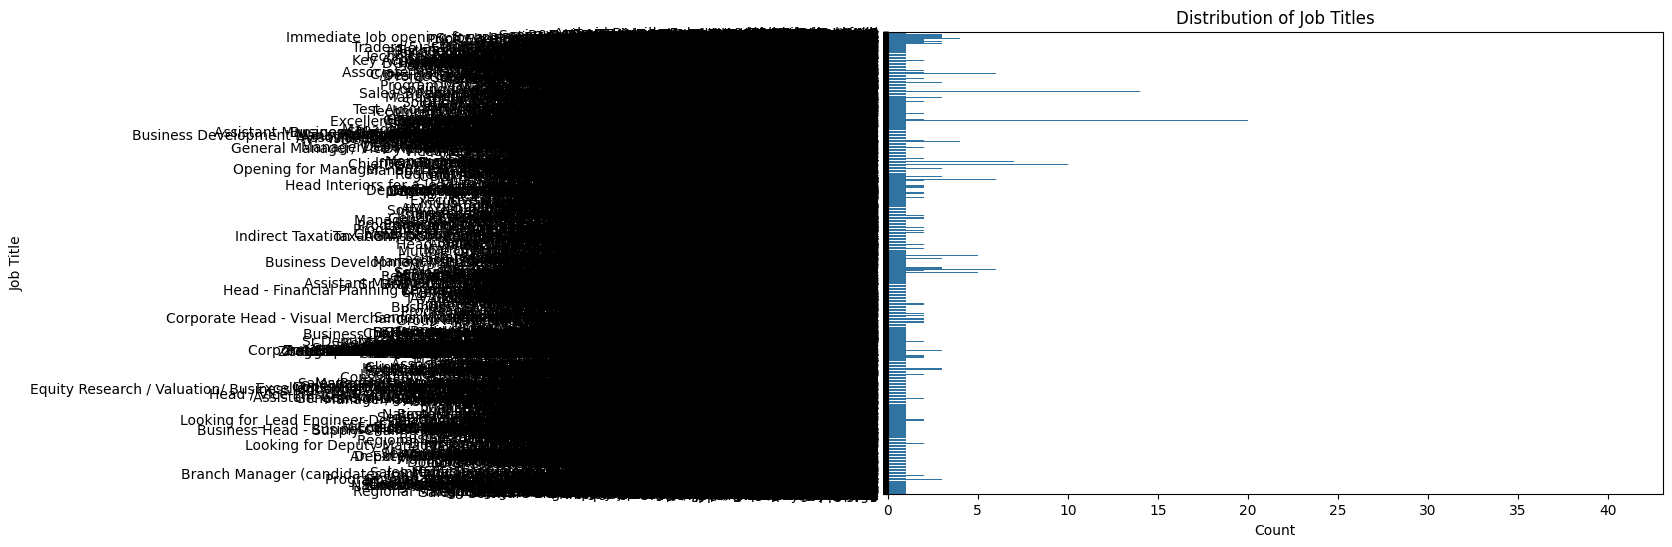

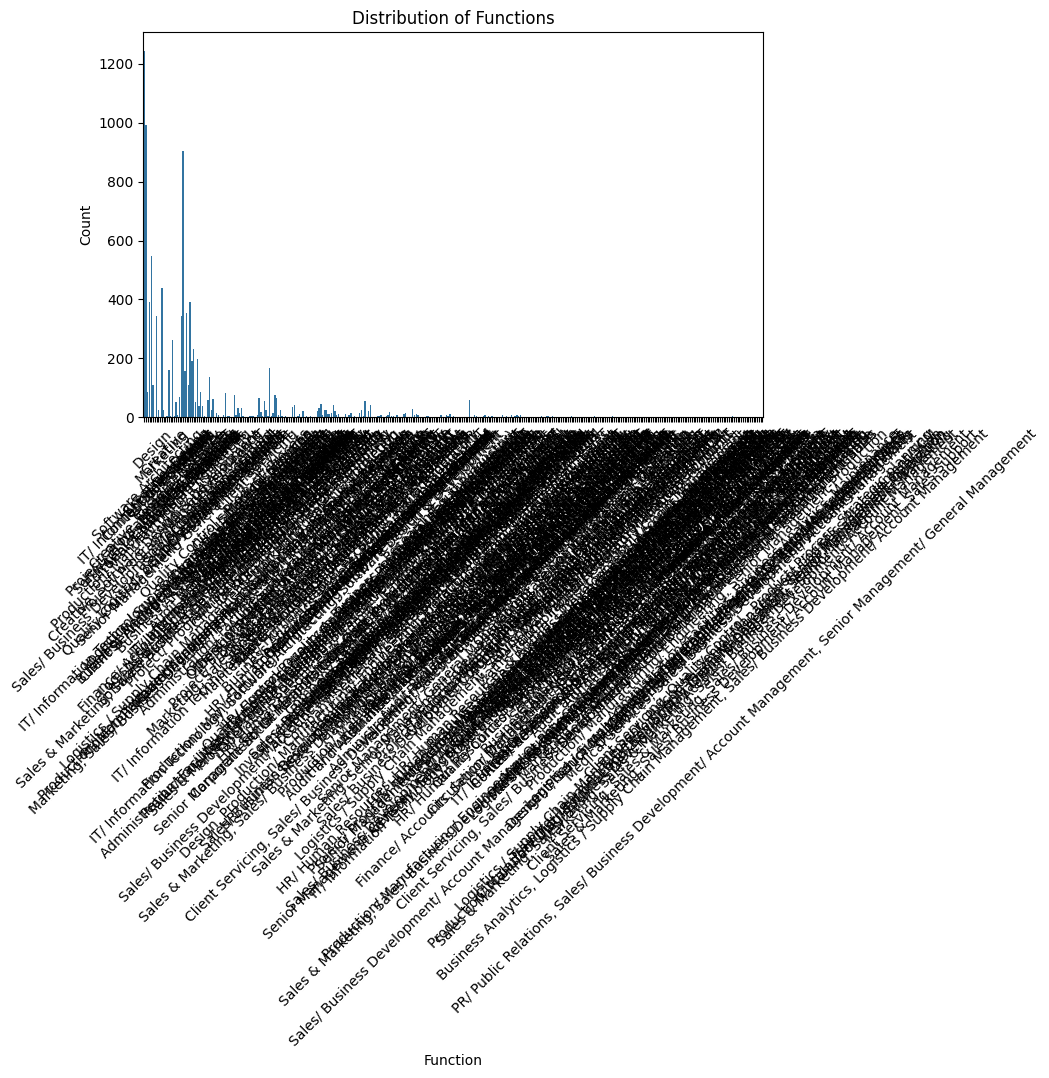

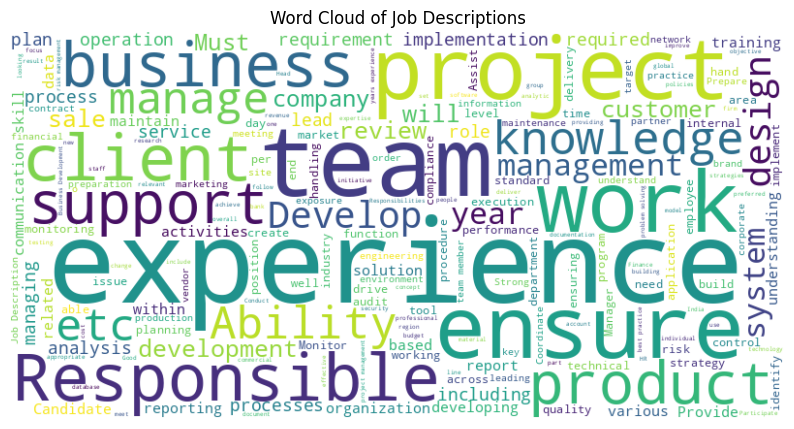

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('function_assignment.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics of numerical features
print(df.describe())

# Distribution of the target variable 'job_title'
plt.figure(figsize=(10, 6))
sns.countplot(y='job_title', data=df)
plt.title('Distribution of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

# Explore categorical features like 'function'
plt.figure(figsize=(8, 5))
sns.countplot(x='function', data=df)
plt.title('Distribution of Functions')
plt.xlabel('Function')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Explore text data in 'jds' field (optional)
# Example: Word cloud of job descriptions
from wordcloud import WordCloud

text = ' '.join(df['jds'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Descriptions')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('function_assignment.csv')

# Data Preprocessing
# Handle missing values
df.fillna('', inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
df['function_encoded'] = label_enc.fit_transform(df['function'])

# Feature Engineering
# Extract features from job descriptions using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['jds'])

# Model Selection
# Split the data into training and testing sets
X = tfidf_matrix
y = df['job_title']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Validation
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Feature Importance
feature_importance = pd.DataFrame({'Feature': tfidf_vectorizer.get_feature_names_out(),
                                   'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print('Top 10 Important Features:')
print(feature_importance.head(10))

# Model Interpretability
# Display a few examples of predictions with corresponding job descriptions
for i in range(5):
    print(f'Actual Job Title: {y_test.iloc[i]}')
    print(f'Predicted Job Title: {y_pred[i]}')
    print(f'Job Description:\n{df.iloc[X_test.indices[i]]["jds"]}\n')

# Save the trained model and feature importance dataframe for future reference
import joblib
joblib.dump(rf_classifier, 'job_title_prediction_model.pkl')
feature_importance.to_csv('feature_importance.csv', index=False)
